In [3]:
'''
1.缩放
2.裁剪
3.翻转
4.改变光照和对比度
'''
import numpy as np
import tensorflow as tf
import  matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

(1535, 1535, 3)


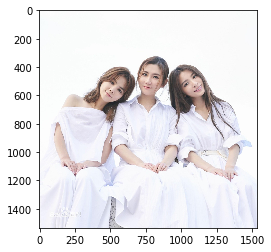

In [3]:
name = './SHE.jpg'
img_string = tf.read_file(name)
img_decode = tf.image.decode_image(img_string)
sess = tf.Session()
img_decode_val = sess.run(img_decode)
print(img_decode_val.shape)
%matplotlib inline
imshow(img_decode_val)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


()
<unknown>
(730, 1200, 3)


'imshow局限性能显示float，但未做归一化是大忌，导致全部白点，没有显示'

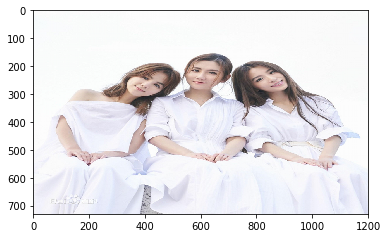

In [5]:
# '''缩放'''
tf.image.resize_area
tf.image.resize_bicubic#二元线性插值法缩放，压缩无损失，放大时像素用二次线性函数计算公式进行计算的
tf.image.resize_nearest_neighbor#放大过程中使用最相近的像素点作为插入值


name = './SHE.jpg'
img_string = tf.read_file(name)
print(img_string.shape)
img_decode = tf.image.decode_image(img_string)
print(img_decode.shape)
img_decode = tf.reshape(img_decode, [1, 1535, 1535,3 ])

resize_img = tf.image.resize_bicubic(img_decode, [730,1200])


sess = tf.Session()
img_decode_val = sess.run(resize_img)
# 图片占位符是float32，所以会直接将0-255之间的整数变成小数，但是并没有归一化！ 
# 要显示float32格式的图片，还需要一步操作
img_decode_val = img_decode_val.reshape((730, 1200, 3))/255.0
print(img_decode_val.shape)
%matplotlib inline
imshow(img_decode_val)
'''imshow局限性能显示float，但未做归一化是大忌，导致全部白点，没有显示'''

(2000, 2000, 3)


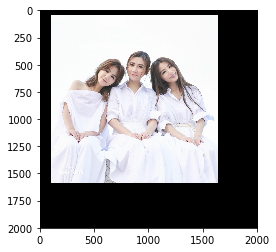

In [19]:
'''裁剪'''
tf.image.pad_to_bounding_box#将图像放到画布上有一个框，其可用pad做填充
tf.image.crop_to_bounding_box#在图像上用框进行裁剪获得新的图像
tf.random_crop#随机的进行裁剪



name = './SHE.jpg'
img_string = tf.read_file(name)
img_decode = tf.image.decode_image(img_string)
img_decode = tf.reshape(img_decode, [1, 1535, 1535,3 ])

padded_img = tf.image.pad_to_bounding_box(img_decode, 50,100,2000,2000)#在一张500*800的画布上将图片放在距离上50，距离做左100的位置上

sess = tf.Session()
img_decode_val = sess.run(padded_img)
img_decode_val = img_decode_val.reshape((2000, 2000, 3))/255.0

print(img_decode_val.shape)
%matplotlib inline
imshow(img_decode_val)

(1535, 1535, 3)


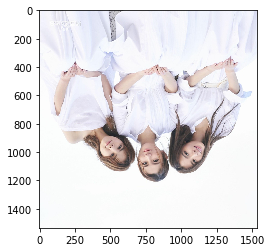

In [20]:
'''翻转'''
tf.image.flip_up_down#上下翻转
tf.image.flip_left_right#左右翻转
tf.image.random_flip_left_right#随机左右翻转
tf.image.random_flip_up_down#随机上下翻转



name = './SHE.jpg'
img_string = tf.read_file(name)
img_decode = tf.image.decode_image(img_string)
img_decode = tf.reshape(img_decode, [1, 1535, 1535,3 ])

flip_img = tf.image.flip_up_down(img_decode)

sess = tf.Session()
img_decode_val = sess.run(flip_img)
img_decode_val = img_decode_val.reshape((1535, 1535, 3))/255.0

print(img_decode_val.shape)
%matplotlib inline
imshow(img_decode_val)

(1535, 1535, 3)


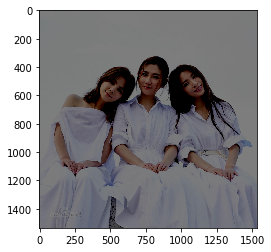

In [23]:
'''改变光照和对比度'''
tf.image.adjust_brightness#调整光照
tf.image.random_brightness#随机调整光照
tf.image.adjust_contrast#调整对比度
tf.image.random_contrast#随机调整对比度

name = './SHE.jpg'
img_string = tf.read_file(name)
img_decode = tf.image.decode_image(img_string)
img_decode = tf.reshape(img_decode, [1, 1535, 1535,3 ])

new_img = tf.image.adjust_brightness(img_decode,-0.5)#光照强度变暗50%

sess = tf.Session()
img_decode_val = sess.run(new_img)
img_decode_val = img_decode_val.reshape((1535, 1535, 3))/255.0

print(img_decode_val.shape)
%matplotlib inline
imshow(img_decode_val)